In [140]:
f = open("dna_sequence.txt", "r").read()
test_list = f.split()
s = ''.join(test_list)
n = 8
chunks = [s[i:i+n] for i in range(0, len(s), n)]
chunks[:7]

['ATTAAAGG',
 'TTTATACC',
 'TTCCCAGG',
 'TAACAAAC',
 'CAACCAAC',
 'TTTCGATC',
 'TCTTGTAG']

### Sequence Alignment of DNA sequence & graph  : similiarity between sequences 

|   |   | A | T |  T | A | A | A | G | G |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  |  | 0 |  1 | 2 | 3 | 4 | 5 | 6 | 7 |
| T | 0 | 1 |  0 | 1 | 2 | 3 | 4 | 5 | 6 |
| T | 1 | 1 |  1 | 0 | 1 | 2 | 3 | 4 | 5 |
| T | 2 | 2 |  1 | 1 | 1 | 2 | 3 | 4 | 5 |
| A | 3 | 2 |  2 | 2 | 1 | 1 | 2 | 3 | 4 |
| T | 4 | 3 |  2 | 2 | 2 | 2 | 2 | 3 | 4 |
| A | 5 | 4 |  3 | 3 | 2 | 2 | 2 | 3 | 4 |
| C | 6 | 5 |  4 | 4 | 3 | 3 | 3 | 3 | 4 |
| C | 7 | 6 |  5 | 5 | 4 | 4 | 4 | 4 | 4 |



In [188]:
def sequence_alignment(x,y,i,j,dp):
    
    if i == 0 and j == 0:
        if x[0] == y[0]:
            return 0
        else:
            return 1
        
    if i == 0 and j != 0 :
        return j
    if j == 0 and i != 0:
        return i
    
    if x[i]==y[j] :
        return sequence_alignment(x,y,i-1,j-1,dp)
    
    else:
        return min(sequence_alignment(x,y,i-1, j,dp)+1, sequence_alignment(x,y,i,j-1,dp)+1, sequence_alignment(x,y,i-1,j-1,dp)+1)

In [189]:
dp = [[0]*8]*8
x1 = 'ATTAAAGG'
y1 = 'TTTATACC'
sequence_alignment(x1,y1,7,7,dp)

4

In [154]:
dp = [[0]*7]*7
chunk_dict= {}
x = chunks[0]
def chunk_append(chunks, dp, x,chunk_dict,i):
    a = []
    for k in chunks:
        if len(k) == 8 and sequence_alignment(x,k, 7,7,dp) == i:
                a.append(k)
    chunk_dict[i] = a
    return chunk_dict


for p in range(8):
    chunk_append(chunks, dp, x, chunk_dict, p)


TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

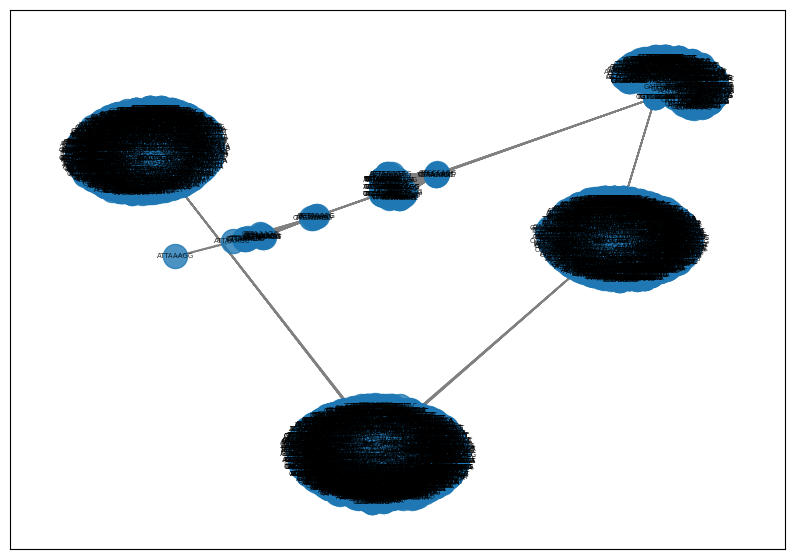

In [165]:
import networkx as nx
import matplotlib.pyplot as plt


                    
def BFS(G, source, pos): 
    
    visited = set()
    queue = []
    queue.append(source)
    
    visited.add(source)
    while queue:
        curr_node = queue.pop(0)
        for i in G[curr_node]:  
            if i not in visited:
                queue.append(i)
                visited.add(i)
            
    return


def CreateGraph(chunk_dict):
    
    G = nx.Graph()
    source = chunk_dict[0][0]
    for k in range(7):
        for chunk1 in chunk_dict[k]:
            i = 0
            for chunk2 in chunk_dict[k+1]:
                if i < 5:
                    G.add_edge(chunk1, chunk2, length = 10)
                    i = i + 1

    return G, source


def DrawGraph(G):
    
    #pos = nx.spring_layout(G)
    
    nx.draw_networkx(G,  with_labels = True, alpha = 0.8,  font_size = 5, edge_color = "gray", cmap=plt.cm.Blues)  #with_labels=true is to show the node number in the output graph
    edge_labels = dict([((u,v,), len(d)) for u, v, d in G.edges(data = True)][:50])
    nx.draw_networkx_edge_labels(G, edge_labels = edge_labels) #prints weight on all the edges
    return pos


G2,source2 = CreateGraph(chunk_dict) 
plt.figure(figsize =(10, 7))
pos2 = DrawGraph(G2)
BFS(G2, source2, pos2)
plt.show()